In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']
X.shape
type(X)
list(X.iloc[0])
type(X)

pandas.core.frame.DataFrame

In [3]:
y.shape
y[0]

'5'

In [4]:
some_digit = X.iloc[0]
type(some_digit)

pandas.core.series.Series

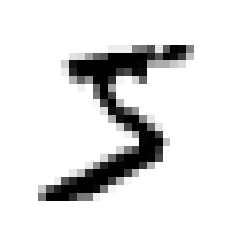

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = np.array(X[:1])
some_digit_image = some_digit.reshape((28,28))

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [6]:
y[0]
y = y.astype(np.uint8)
y[0]==5
#X[:0]

True

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
type(X[:0])
X[1:0]
#X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784


In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print(len(X_train), len(y_train_5))

60000 60000


In [9]:
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [10]:
np.unique(y_train_5)

array([False,  True])

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
print(X[:1])

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.0       0.0  

[1 rows x 784 columns]


In [13]:
sgd_clf.predict(some_digit)

array([ True])

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [15]:
from sklearn.base import BaseEstimator
import numpy as np

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype= bool)

In [16]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_predict)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [19]:
y_train_perfect_prediction = y_train_5

confusion_matrix(y_train_5, y_train_perfect_prediction)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_predict))
print(recall_score(y_train_5, y_train_predict))

0.8370879772350012
0.6511713705958311


In [21]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_predict)

0.7325171197343846

In [22]:
y_scores = sgd_clf.decision_function(some_digit)
print(some_digit)
print(y_scores)

threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   

In [23]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


In [24]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5, method='decision_function')

In [25]:
print(y_scores, len(y_scores))
print('/////////////')
print(y_scores > 0)

[  4411.53413566 -14087.12193543 -21565.51993633 ...   9394.4695853
  -2918.25117218  -9160.6081938 ] 60000
/////////////
[ True False False ...  True False False]


In [26]:
from sklearn.metrics import precision_recall_curve

prcissions, recall, threshold = precision_recall_curve(y_train_5, y_scores)

In [27]:
prcissions[8000]
print(threshold[:])
#threshold_location = 8000
len(threshold)
print(len(threshold)-1000)
print(threshold[len(threshold)-1])

[-71657.12621734 -71564.61915861 -71564.46030853 ...  28900.06013894
  31207.1376772   33370.36083388]
58922
33370.360833875304


In [28]:
def plot_precision_recall_vs_threshold(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "b--", label='precision',)
    plt.plot(threshold, recall[:-1], 'g--', label='recall')
    
    highlight_point = 57000
    index = np.argmax(precision >= 0.9)
    print(index)

    plt.title('Threshold')
    plt.grid(True)
    plt.axis([-50000,40000,0.0,1.0])
    plt.legend(frameon=False)
    plt.axhline(precision[index], color ="orange", linestyle ="--")
    plt.axhline(recall[index], color ="orange", linestyle ="--")
    plt.axvline(threshold[index], color ="orange", linestyle ="--")

55954


<function matplotlib.pyplot.show(close=None, block=None)>

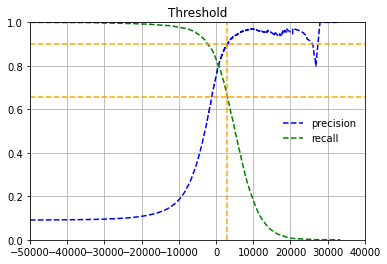

In [29]:
plot_precision_recall_vs_threshold(prcissions, recall, threshold)
plt.show

In [30]:
threshold_90_precision = threshold[np.argmax(prcissions >= 0.9)]
print(threshold_90_precision)
#threshold[threshold == threshold_90_precision]

y_train_pred_90 = (y_scores >= threshold_90_precision)

precission_sc = precision_score(y_train_5, y_train_pred_90)
recall_sc = recall_score(y_train_5, y_train_pred_90)

print(precission_sc, recall_sc)

3045.925822705364
0.9002016129032258 0.6589190186312488


In [31]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train_5, y_scores)

print(fpr)
print(tpr)

[0.         0.         0.         ... 0.99857088 0.99857088 1.        ]
[0.00000000e+00 1.84467810e-04 7.37871241e-04 ... 9.99815532e-01
 1.00000000e+00 1.00000000e+00]


In [32]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label= label)
    plt.plot([0,1], [0,1], 'k--')
    
    plt.axis()
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.grid(True)

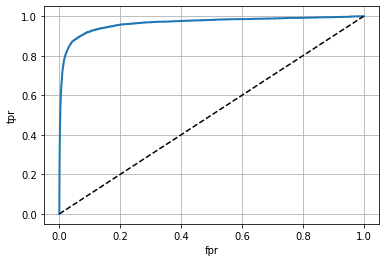

In [33]:
plot_roc_curve(fpr, tpr)
plt.show()

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9648211175804801

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [36]:
print(y_probas_forest[:,1])
print("/////////////")
#print(y_scores_forest)
print(y_train_5)

[0.89 0.01 0.04 ... 0.98 0.08 0.06]
/////////////
0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool


In [37]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

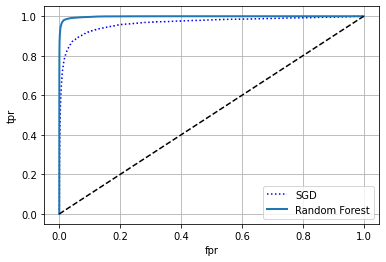

In [38]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [39]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [40]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict(some_digit)

array([5], dtype=uint8)

In [41]:
some_digit_scores = svm_clf.decision_function(some_digit)
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [42]:
y_scores
y_some_digit_pred = (y_scores >= 2413)
print(y_some_digit_pred)

[ True False False ...  True False False]


In [43]:
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [44]:
np.argmax(some_digit_scores)
svm_clf.classes_
svm_clf.classes_[5]

5

In [45]:
from sklearn.multiclass import OneVsRestClassifier

ovr_classifier = OneVsRestClassifier(SVC())
ovr_classifier.fit(X_train, y_train)

ovr_classifier.predict(some_digit)

array([5], dtype=uint8)

In [46]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict(some_digit)
sgd_clf.decision_function(some_digit)

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [47]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(sgd_clf, X_train_scale, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

In [49]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scale, y_train, cv=3)

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

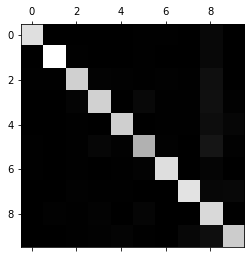

In [50]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [51]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

In [52]:
from sklearn.neighbors import KNeighborsClassifier

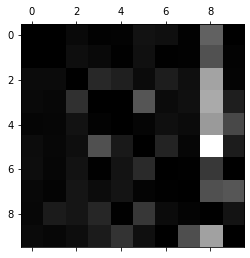

In [53]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [54]:
#from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_trian_odd = ((y_train % 2) == 1)

y_multilabel = np.c_[y_train_large, y_trian_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [55]:
knn_clf.predict(some_digit)

array([[False,  True]])

In [56]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
print(y_train_knn_pred)

f1_pred = f1_score(y_multilabel, y_train_knn_pred, average='macro')
print(f1_pred)

[[False  True]
 [False False]
 [False False]
 ...
 [False  True]
 [False False]
 [ True False]]
0.976410265560605


In [57]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [58]:
knn_clf.fit(X_train_mod, y_train_mod)


KNeighborsClassifier()

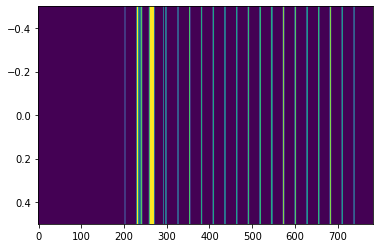

In [59]:
clean_digit = knn_clf.predict(X_test_mod[:1])
plt.imshow(clean_digit, aspect='auto')